In [34]:
import tensorflow as tf
import numpy as np
import math
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 10)

In [2]:
sess = None
def resetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

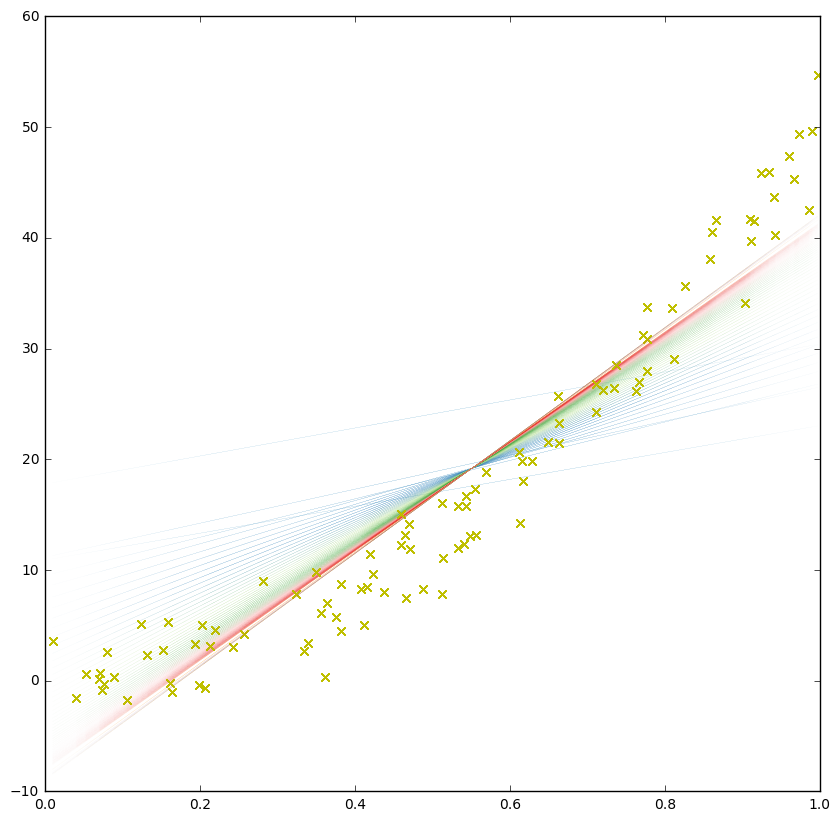

final value of the loss function is  24.7098
The final prediction on value 10 is [ 501.78662109]


'soumya_checkpoint.ckpt'

In [35]:
resetSession()

#generate training data
x_train = np.random.rand(100).astype(np.float32)
e_train = np.random.normal(loc = 0, scale = 3, size = 100).astype(np.float32)
y_train = 0.1 + 50*x_train**2 + e_train
#pylab.plot(x_train, y_train, 'r.')

#generate test data
x_test = np.random.rand(len(x_train)).astype(np.float32)
e_test = np.random.normal(loc = 0, scale = 3, size = len(x_train)).astype(np.float32)
y_test = 0.1 + 50*x_test**2 + e_test
#pylab.plot(x_test, y_test, 'b.')

# Build computational graph
W = tf.Variable(tf.random_normal([1]), name = "coefficients", dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), name = "offset", dtype = tf.float32)

#define a placeholder for the data to be transformed
x = tf.placeholder(dtype = tf.float32, shape = [None], name = "x")

#y will hold the predicted values
y = tf.add(tf.mul(W, x),b)

summary = tf.train.SummaryWriter("summaries/", graph=tf.get_default_graph())

#y_label is meant to hold the eval values
y_label = tf.placeholder(shape = [None], dtype=tf.float32, name = "y_label")

loss = tf.reduce_mean(tf.square(y - y_label)) # both y and y_label depend on the placeholders x and y_label respectively
optimizer = tf.train.GradientDescentOptimizer(0.5) #this sets up a gradient descent computation with learning rate 0.5
train = optimizer.minimize(loss) #this is a minimization op

init = tf.initialize_all_variables() #graph init op

#initialize all variables

sess.run(init)
# apparently I can 'run' a list of ops like so:
print("running W and b", sess.run([W,b]), "\n\n")

x_in = [3,4]
print("if x is %s, then y is " % x_in, sess.run(y, feed_dict={x:x_in}), "\n\n")

#evaluate the loss function:

def eval_loss():
    return sess.run(loss, feed_dict= {x: x_test, y_label:y_test})
print("initial value of loss function is", eval_loss())

tf.scalar_summary("loss", loss)
summary_op = tf.merge_all_summaries()

pylab.plot(x_train, y_train, "yx")
pylab.plot(x_train, sess.run(y, feed_dict = {x:x_train}, ), "g-")
plt.show()
pylab.clf()

import time
from IPython import display

plt.ion()

#Set number of iterations N
N = 101

for step in range(N):
    summary_str, _ = sess.run([summary_op, train], feed_dict={x:x_train, y_label:y_train})
    summary.add_summary(summary_str, step)
    pylab.plot(x_train, y_train, "yx")
    if step%20 == 0 or step < N:
        #print(step, sess.run([W,b]), eval_loss())
        if step%10==0 or step <(N/2):
            plt.plot(x_train, sess.run(y, feed_dict = {x:x_train}, ), color = pylab.cm.Paired(np.linspace(0,1,N)[step]), lw = 0.005)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1e-100)
pylab.clf()

print("final value of the loss function is ", eval_loss())


#pylab.plot(x_train, y_train, "r.")
#pylab.plot(x_train, sess.run(y, feed_dict = {x:x_train}, ), "g-")

def prediction(x_in):
    return sess.run(y, feed_dict={x:x_in})

print("The final prediction on value 10 is %s" % prediction([10]))
#save the model

saver = tf.train.Saver()
saver.save(sess, "soumya_checkpoint.ckpt")

#make predictions
